In [1]:
import numpy as np
from sympy import *
from matplotlib import pyplot as plt

In [2]:
def image(a1, a2, s):
    fig, ax = plt.subplots()
    ax.plot(a1, a2, '-', color = 'darkblue')
    ax.set_title(s)
    ax.grid()
    plt.show()

#### Начальные условия

In [3]:
mu = 0.012277471
eta = 1 - mu

def A(x, y):
    return np.sqrt(((x + mu)**2 + y**2)**3)
def B(x, y):
    return np.sqrt(((x - eta)**2 + y**2)**3)

def dx_dt(x, u, y, v):
    return u
def du_dt(x, u, y, v):
    return x + 2*v - eta * ((x + mu)/ A(x, y)) - mu * ((x - eta) / B(x, y))
def dy_dt(x, u, y, v):
    return v
def dv_dt(x, u, y, v):
    return y - 2*u - eta * (y / A(x, y)) - mu * (y / B(x, y))

def f(t, u):
    a1 = dx_dt(u[0], u[1], u[2], u[3])
    a2 = du_dt(u[0], u[1], u[2], u[3])
    a3 = dy_dt(u[0], u[1], u[2], u[3])
    a4 = dv_dt(u[0], u[1], u[2], u[3])
    return np.array([a1, a2, a3, a4])

u0 = np.array([0.994, 0, 0, -2.00158510637908252240537862224])

#### Методы Рунге-Кутты

In [4]:
def abs_(vect):
    s = 0
    for i in range(len(vect)):
        s += vect[i]**2
    return s**(1/2)

def RK2(f, t, u, h):
    c_ = u + h/2 * f(t, u)
    v0 = u
    v = v0
    eps = 1e-5
    while True:
        if abs_(c_ + h/2 * f(t + h, v) - v) < eps:
            return v
        v = c_ + h/2 * f(t + h, v)

def RK4(f, t, u, h): 
    k1 = h * f(t, u) 
    k2 = h * f(t + 0.5*h, u + 0.5*k1) 
    k3 = h * f(t + 0.5*h, u + 0.5*k2) 
    k4 = h * f(t + h, u + k3) 
    return u + (k1/6) + (k2/3) + (k3/3) + (k4/6)

#### Расчёт

In [5]:
u = u0
u_ = [u0]

t = 0
h = 1e-4
T = 34

while t < T:
    u = RK2(f, t, u, h)
    u_.append(u)
    t += h

u_ = np.array(u_)

#### Графики

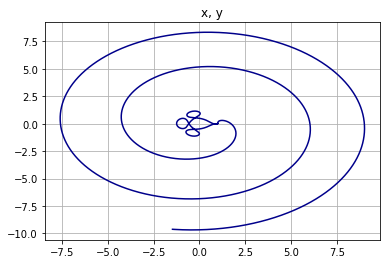

In [6]:
#image(np.linspace(0, T, num = len(u_)), u_[:, 0], 'x(t)')
image(u_[:, 0], u_[:, 2], 'x, y')